In [1]:
data plastic;
input Y X;
datalines;
199 16
205 16
196 16
200 16
218 24
220 24
215 24
223 24
237 32
234 32
235 32
230 32
250 40
248 40
253 40
246 40
;
run;

SAS Connection established. Subprocess id is 2226



In [5]:
proc means data=plastic;
run;

Variable,N,Mean,Std Dev,Minimum,Maximum
Y X,16 16,225.5625000 28.0000000,19.0506999 9.2376043,196.0000000 16.0000000,253.0000000 40.0000000



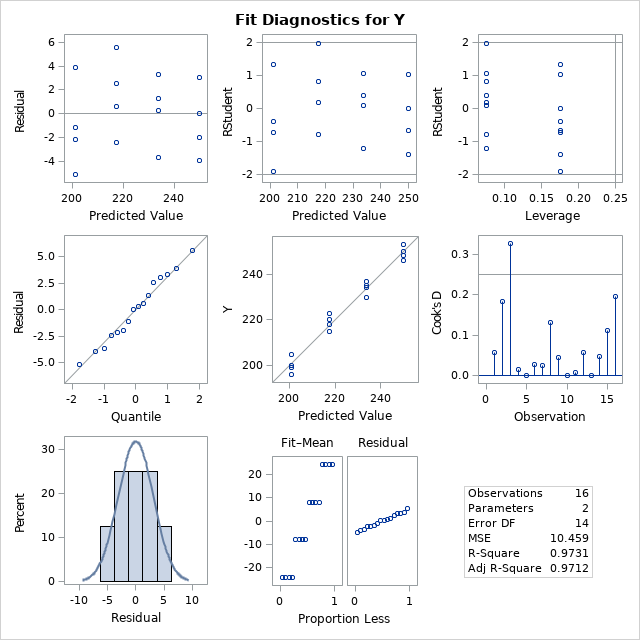
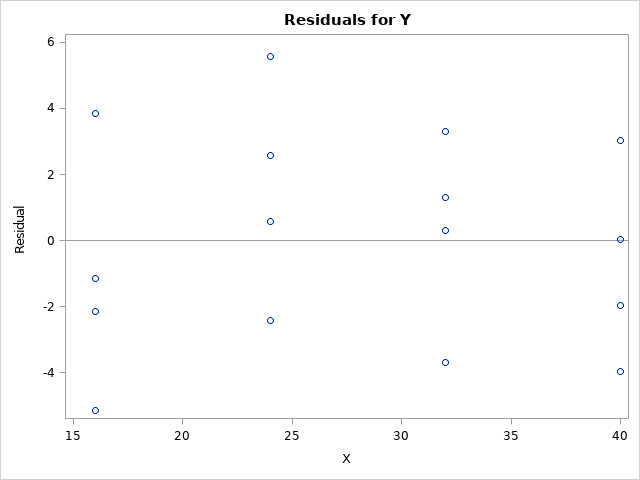
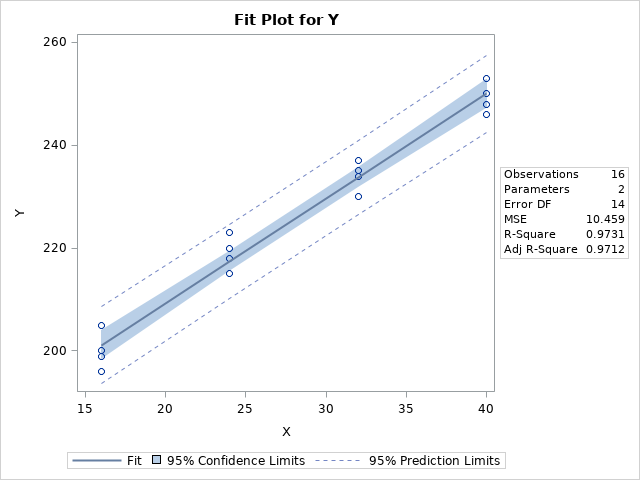
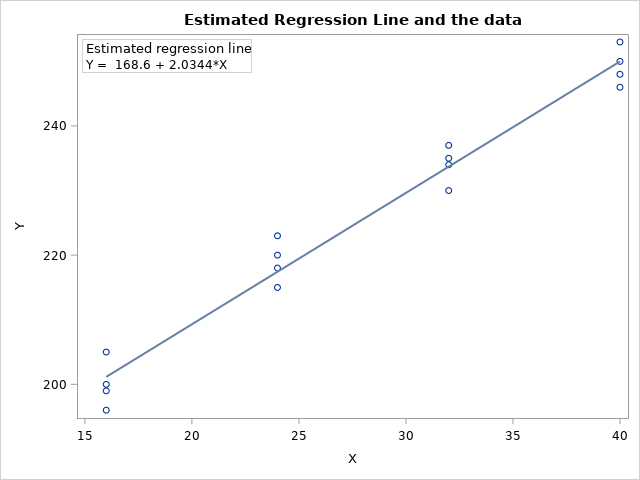

In [16]:
*draw regression line and observations;
ods html file="\Regression\1a.htm";
proc reg data=plastic; *simple linear regression;
   model y = x;
   ods output ParameterEstimates=PE;
run;    

data _null_;
   set PE;
   if _n_ = 1 then call symput('Int', put(estimate, BEST6.));    
   else            call symput('Slope', put(estimate, BEST6.));  
run;

ods listing gpath="\Regression";
proc sgplot data=plastic noautolegend;
   title "Estimated Regression Line and the data";
   reg y=y x=x;
   inset "Y = &Int + &Slope*X" / 
         border title="Estimated regression line" position=topleft;
run


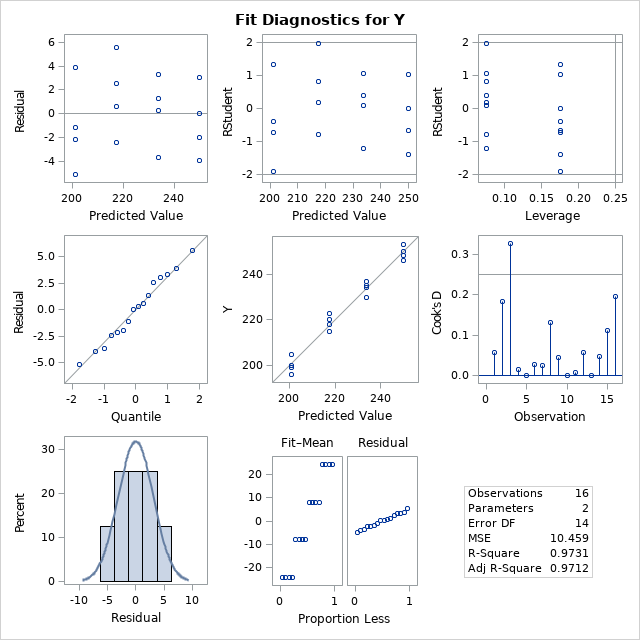
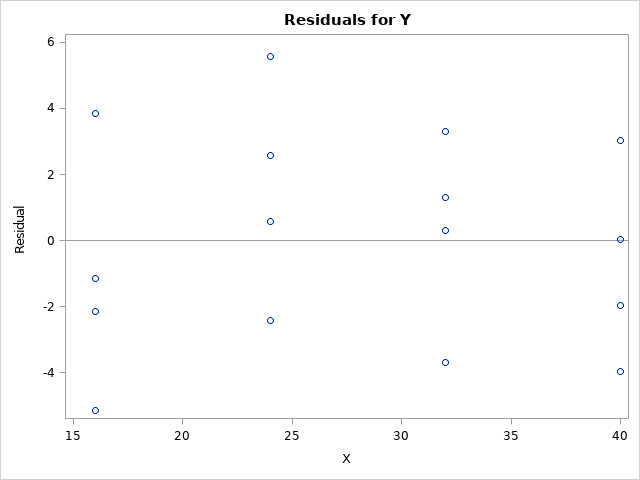
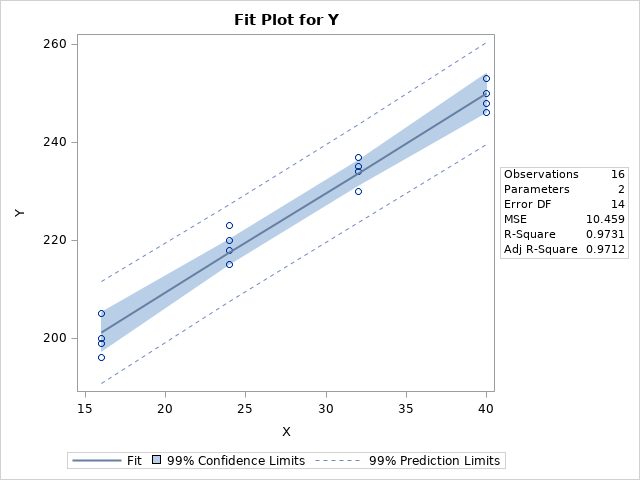

In [2]:
ods html file="\Regression\hw1-2.htm";
title "99 percent confidence interval of b1";
proc reg data=plastic alpha=.01; *simple linear regression;
   model y = x / clb;
run; 

In [11]:
title;
ods graphics off;
ods html file="\Regression\hw-1-2-b.htm";
*two-sided one-sample t test;
proc reg data=plastic alpha=.01;
model y=x;
x:test x=2;
run;


In [4]:
ods html file="\Regression\hw1-2-c.htm";
title "Plastic Problem - Q2,c: Calculation of Power";
data power;
cutval = tinv(.995,14);
sigma = 0.1;
beta =   0.3;
delta = beta / sigma;
powerhigh = 1 - CDF('t', cutval, 14, delta);
powerlow = CDF('t', -cutval, 14, delta);
power = powerhigh + powerlow;
run;
proc print; run;

Obs,cutval,sigma,beta,delta,powerhigh,powerlow,power
1,2.97684,0.1,0.3,3,0.52790,6.5967E-8,0.52790



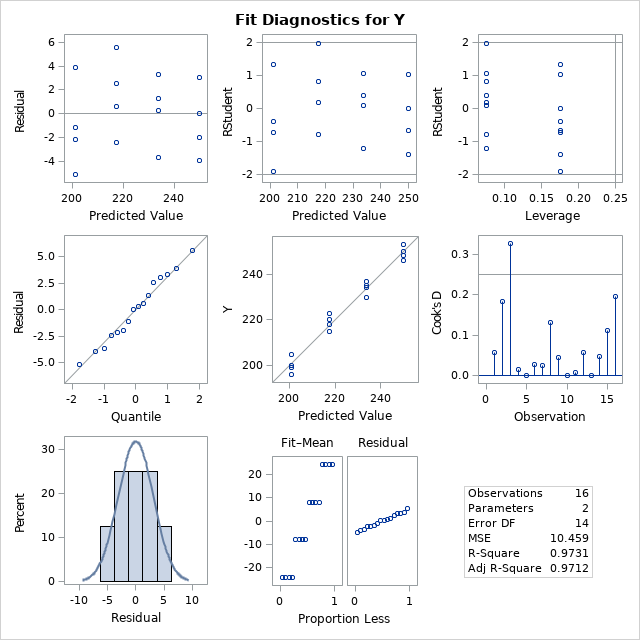
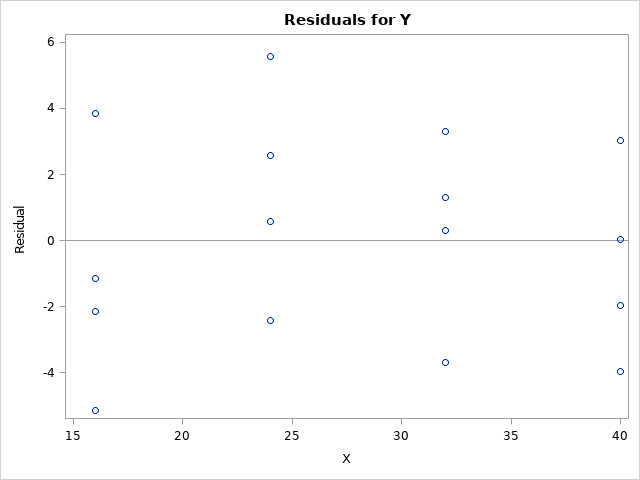
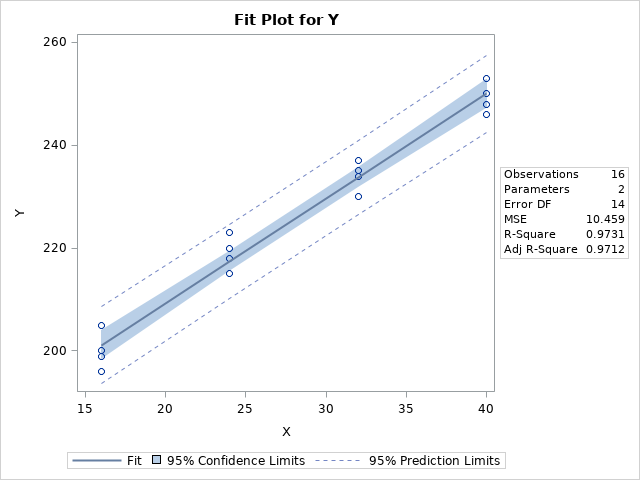

In [28]:
*plot;
proc reg data=plastic;
    model y=x;
    output out=b
       p=yhat
       r=yresidual;
run;
    
    
run;
*output LR results;
proc print data=b;
run;




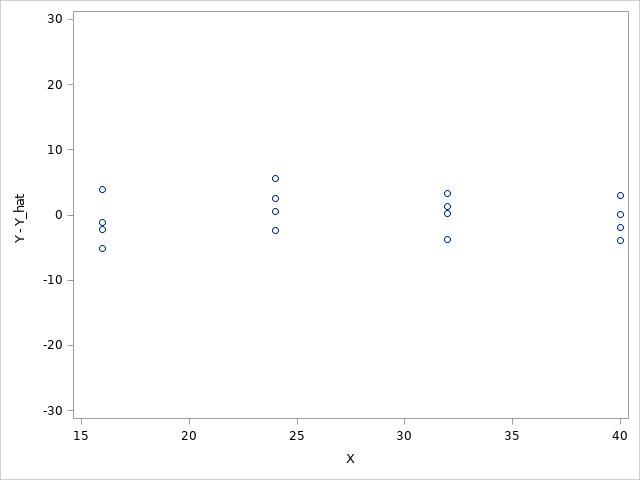
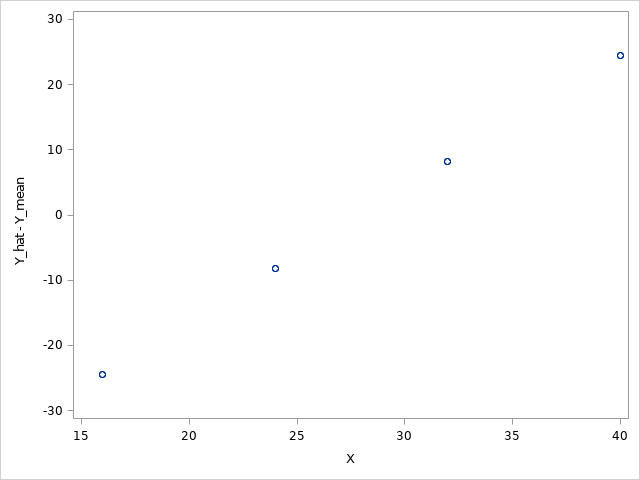

In [55]:
*plot1:y-yhat=residual;
ods pdf file="Regression\hw1-3-c.pdf";
proc sgplot data=b;
    scatter x=x y=yresidual;
        yaxis label="Y - Y_hat" min=-30 max=30 ;
run;
*plot2: y_hat-y_mean;
data c;
 set b;
 deviationReg = yhat - 225.56;
run;

proc sgplot data=c;
    scatter x=x y=deviationReg;
    yaxis label="Y_hat - Y_mean" min=-30 max=30;
run;

In [42]:
proc means data=plastic;
 var y;
run;